# Do winning numbers in the Powerball lottery follow a uniform distribution?

Powerball is a lottery game. A player wins the jackpot (as of 01/12/16 at 1.2 Billions of US dollars) if he/she matches the 6 numbers. The first 5 numbers (known as the white balls) can range from 1 to 69, inclusive, whereas the 6th number (known as the red ball, or power ball, and not part of this analysis) can range from 1 to 26, inclusive. There is a 7th ball (known as the Power Play), which it not subject of this analysis, and is therefore ignored. 

The following analysis takes a look at historical data with the -modest- hope that there are certain numbers with higher probabilities of being drawn. Any reasonable person would know what to do if the numbers drawn do not follow an uniform distribution ;)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Wait... upon investigation, there is one caviat: The range of the values of the white balls has changed over time, and therefore one cannot do a proper statistical analysis using all the data at the same time: it can, however, be segmented and analyzed in chunks. 

In [2]:
#the numbers have changed. let's define those periods#
#There is data starting from year 1997. 

#From Wikipedia (retrieved on 01/12/2016)
#Starting date |Pick 5 of |Pick 1 of
#April 22,92   | 45       | 45 
#Nov 5, 97     | 49       | 42
#Oct 9, 02     | 53       | 42
#Aug 28, 05    | 55       | 42
#Jan 7, 09     | 59       | 39
#Jan 15, 12    | 59       | 35
#Oct 7, 2015   | 69       | 26


df=pd.read_csv('historyAllDates.csv')
df['date']=pd.to_datetime(df['date'].values,utc=False) #convert to datetime object
df.columns = map(str.lower, df.columns)
df.head()

,date,wb1,wb2,wb3,wb4,wb5,pb,pp
0,2016-09-07,23,55,33,22,29,21,2.0
1,2016-09-03,39,59,7,67,50,25,3.0
2,2016-08-31,10,56,24,61,5,12,2.0
3,2016-08-27,48,32,63,4,49,20,2.0
4,2016-08-24,25,11,9,65,64,16,3.0


In [3]:
def doHistForWhiteBallAnalysis( df, numUniqueBalls ):
    #Set up figure and axis
    fig, ax = plt.subplots(nrows=1, ncols=1)
    fig.set_size_inches(18.5, 10.5)
    
    ballNumber = ['Ball#1', 'Ball#2', 'Ball#3','Ball#4','Ball#5']

    ax.hist( df[['wb1','wb2','wb3','wb4','wb5']].as_matrix(), numUniqueBalls, normed=0, histtype='bar', label = ballNumber)
    
    ax.legend(prop={'size': 12})
    
    ax.set_xlabel('Ball value')
    ax.set_ylabel('# times drawn')
                             
    plt.title('Lottery numbers histogram')
    plt.show()

## Data starts at 11/1/1997 to 9/7/2016

### Analyze 2nd time segment (years 1997-2002)

Num of points is 514


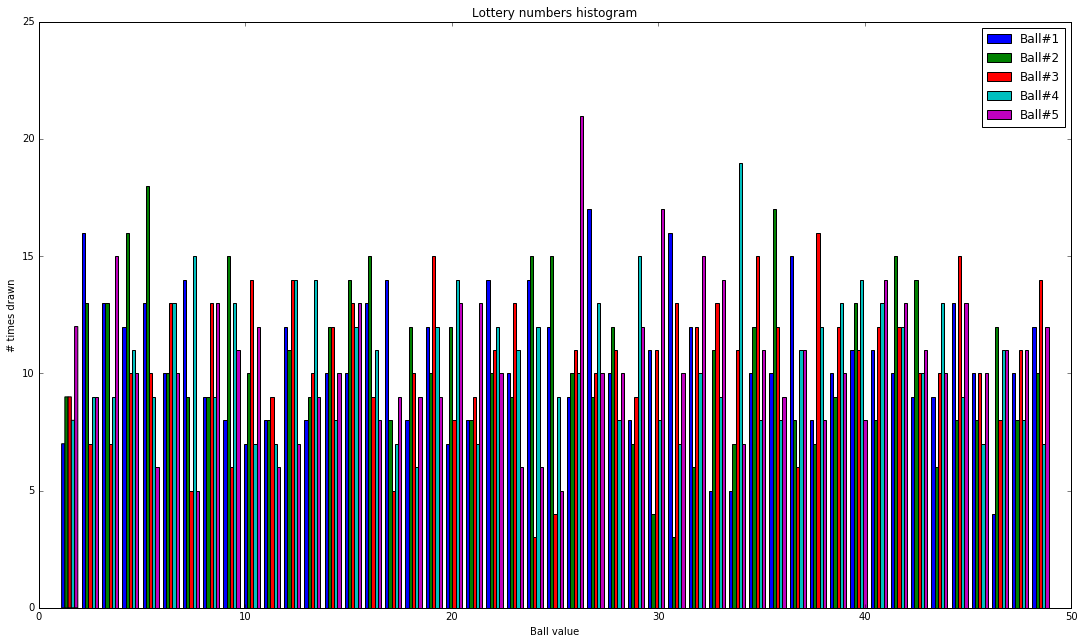

In [4]:
sel = (df.date >= '1997/11/5') & (df.date < '2002/10/9')
print('Num of points is ' + str(len(df[sel])))

numUniqueBalls = 49

doHistForWhiteBallAnalysis( df[sel], numUniqueBalls )

A-ha! It can be seen that certain values HAD a higher probability of being drawn!
Note that ONE CAN to establish a confidence level on the results. This can be done with the number of samples (514 in this case). 

### Analyze 3rd time segment (years 2002-2005)

Num of points is 302


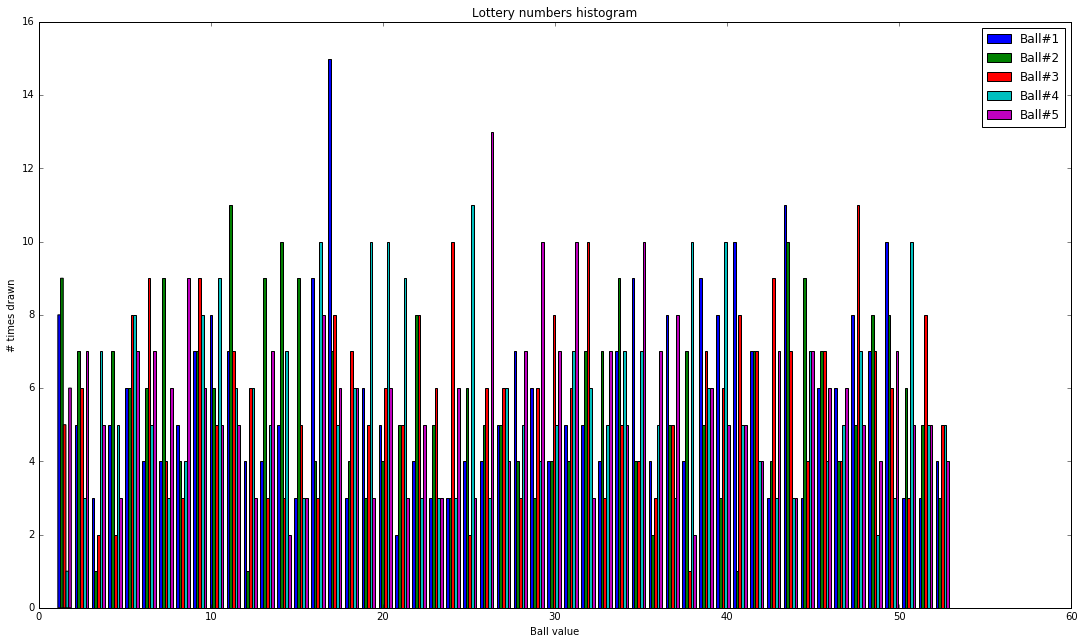

In [5]:
sel = (df.date >= '2002/10/9') & (df.date < '2005/08/28')
print('Num of points is ' + str(len(df[sel])))

numUniqueBalls = 53

doHistForWhiteBallAnalysis( df[sel], numUniqueBalls )

### Let's now do one last time segment: the current one

Num of points is 95


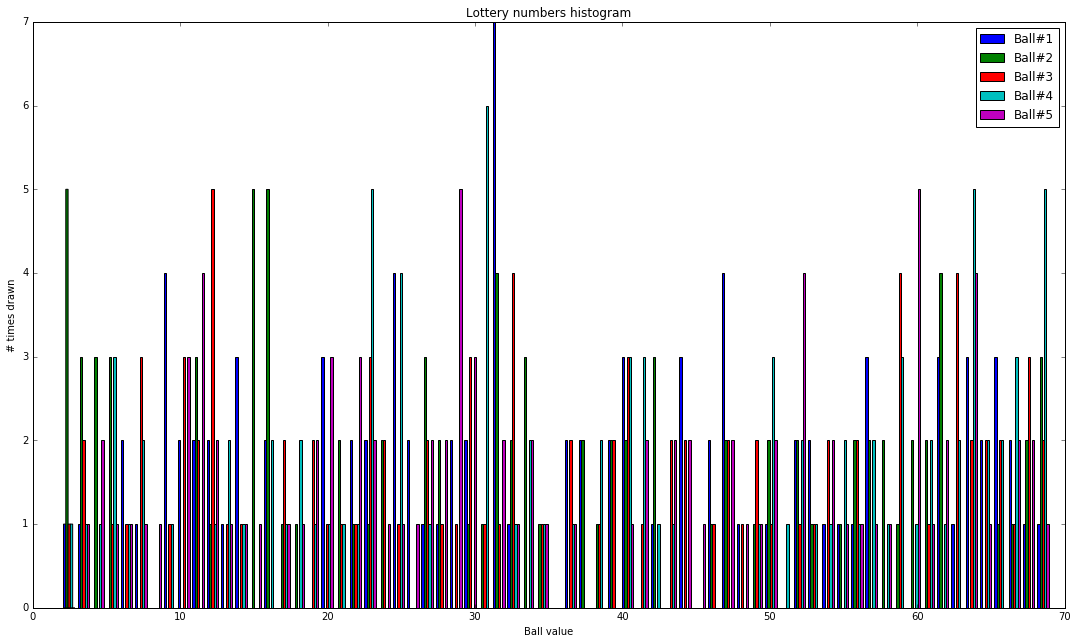

In [6]:
sel = (df.date >= '2015/10/7') 
print('Num of points is ' + str(len(df[sel])))

numUniqueBalls = 69

doHistForWhiteBallAnalysis( df[sel], numUniqueBalls )

Unfortunately, there are only 95 data points (at the time we got the numbers from the PowerBall website) to have some confidence on the results. We'll come back later to do analyses on both the Power and red balls.  